In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

##Dataset 1


---
Data set ini terdiri dari data historis terkait dengan kasus COVID-19 di Indonesia pada 
periode 2 – 31 Maret 2020. Data historis yang tersedia di antaranya jumlah akumulatif 
tes sampel, terkonfirmasi positif, terkonfirmasi negatif, dan data lainnya. 



In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Visdat Midterm/Data Set 1.csv')
df.set_index('date')
dfLen = df.count()['date']
df.head(8)

Mounted at /content/drive


,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4
5,07-Mar-20,4,454,0,4,422,28,4
6,08-Mar-20,29,483,2,6,445,32,6
7,09-Mar-20,60,543,13,19,487,37,19


###Soal 1
Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

In [3]:
soal1 = df[['date','acc_confirmed', 'acc_negative', 'acc_tested']]

soal1.head(8)

,date,acc_confirmed,acc_negative,acc_tested
0,02-Mar-20,2,335,339
1,03-Mar-20,2,337,341
2,04-Mar-20,2,356,372
3,05-Mar-20,2,371,388
4,06-Mar-20,4,422,450
5,07-Mar-20,4,422,454
6,08-Mar-20,6,445,483
7,09-Mar-20,19,487,543


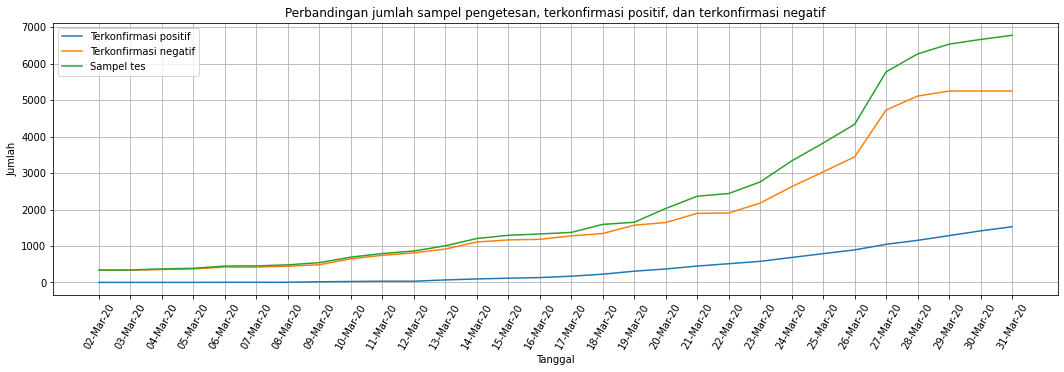

In [4]:


soal1.plot(figsize=(18,5), x='date')
plt.legend(['Terkonfirmasi positif', 'Terkonfirmasi negatif', 'Sampel tes'])
plt.title('Perbandingan jumlah sampel pengetesan, terkonfirmasi positif, dan terkonfirmasi negatif')
plt.ylabel('Jumlah')
plt.xlabel('Tanggal')
plt.xticks(range(dfLen), soal1['date'],rotation='60')
plt.grid()
plt.show()

###Soal 2
*   Hitunglah  nilai  positive  rate  dan  negative  rate  untuk  masing-masing  waktu.
*   Dengan  menggunakan  bar  plot,  tampilkan  perbandingan  positivity  rate  dan negativity rate untuk periode waktu yang tersedia.
*   Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?
*   Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [5]:
soal2 = df
positive_rate = (soal2['acc_confirmed']/soal2['acc_tested'])*100
negative_rate = (soal2['acc_negative']/soal2['acc_tested'])*100

soal2['positive_rate'] = positive_rate
soal2['negative_rate'] = negative_rate
soal2.head(8)

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,positive_rate,negative_rate
0,02-Mar-20,339,339,2,2,335,2,2,0.589971,98.820059
1,03-Mar-20,2,341,0,2,337,2,2,0.586510,98.826979
2,04-Mar-20,31,372,0,2,356,14,2,0.537634,95.698925
3,05-Mar-20,16,388,0,2,371,15,2,0.515464,95.618557
4,06-Mar-20,62,450,2,4,422,24,4,0.888889,93.777778
5,07-Mar-20,4,454,0,4,422,28,4,0.881057,92.951542
6,08-Mar-20,29,483,2,6,445,32,6,1.242236,92.132505
7,09-Mar-20,60,543,13,19,487,37,19,3.499079,89.686924


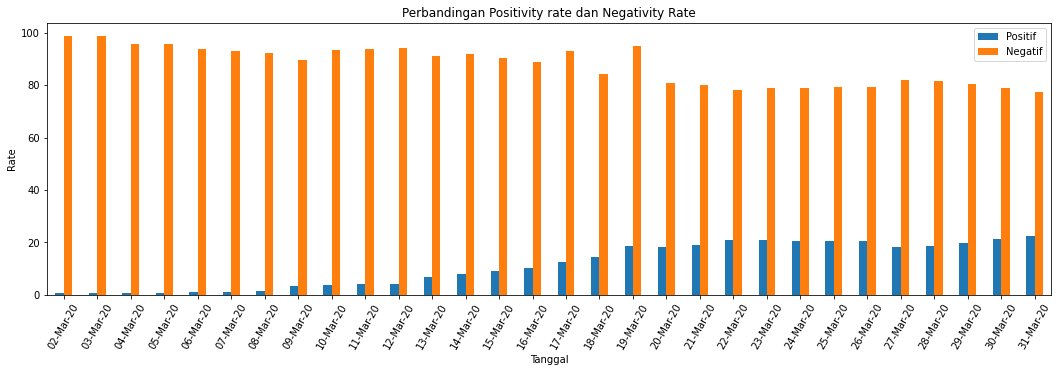

In [6]:
soal2[['positive_rate','negative_rate']].plot(figsize=(18,5), kind='bar')
plt.title('Perbandingan Positivity rate dan Negativity Rate')
plt.legend(['Positif', 'Negatif'])
plt.xticks(range(dfLen), soal2['date'], rotation='60')
plt.xlabel('Tanggal')
plt.ylabel('Rate')
plt.show()

In [7]:
print('Positivity rate tertinggi pada tanggal :',soal2.loc[soal2['positive_rate'].idxmax()]['date'])
print('Negativity rate tertinggi pada tanggal :',soal2.loc[soal2['negative_rate'].idxmax()]['date'])

Positivity rate tertinggi pada tanggal : 31-Mar-20
Negativity rate tertinggi pada tanggal : 03-Mar-20


###Soal 3
*   Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada dataset. 
*   Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan penjelasan terkait nilai korelasi tersebut. 
*   Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan penjelasan terkait nilai korelasi tersebut.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

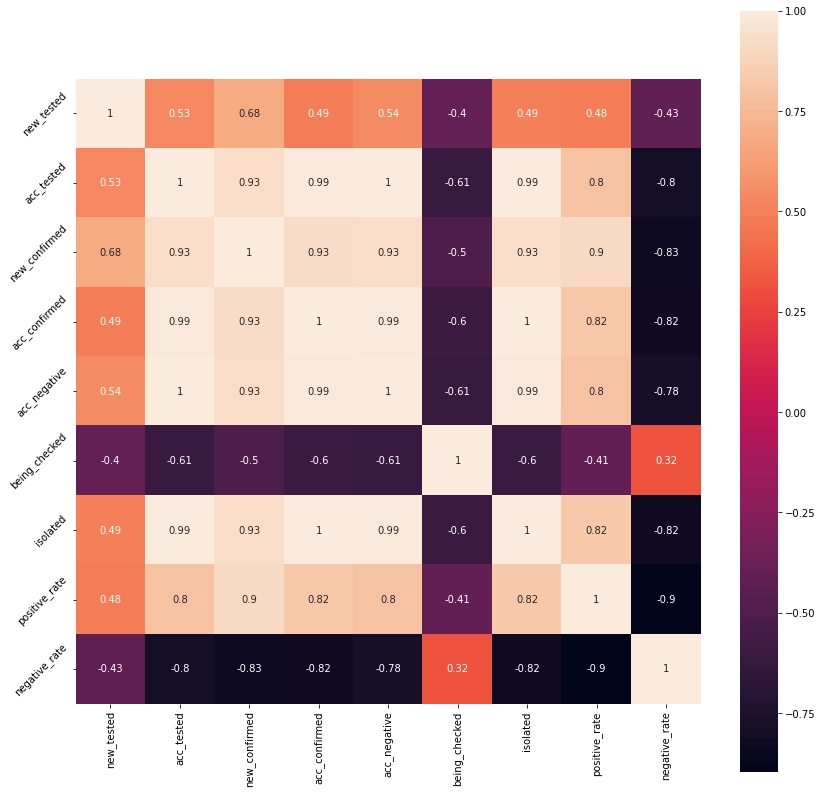

In [8]:
plt.figure(figsize=(14,14))
sns.heatmap(df[df.columns].corr(), square=True, annot=True)
plt.yticks(rotation=45)

####Variabel yang memiliki nilai paling positif
*   acc_tested dan acc_negative
*   acc_confirmed dan isolated

4 variabel tersebut memiliki nilai korelasi 1 yang merupakan tanda bahwa apabila salah satu terjadi kenaikan, maka variabel pasangannya akan mengalami peningkatan





####Variabel yang memiliki nilai paling negatif
*   being_checked dan acc_negative
*   being_checked dan acc_tested

4 variabel tersebut memiliki nilai korelasi -0.61 yang merupakan tanda bahwa apabila salah satu terjadi kenaikan, maka variabel pasangannya akan mengalami penurunan





##Dataset 2


---
Data set ini menyajikan data spasial terkait kasus COVID-19 di masing-masing provinsi 
di Indonesia. Data yang disajikan di antaranya jumlah populasi, jumlah kasus positif, dan 
lain-lain. 


In [9]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Visdat Midterm/Data Set 2.csv')
df.set_index('province_id')
dfLen = df.count()['province_id']
df.head(8)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382
5,6,DKI Jakarta,Jawa,JK,Jakarta,10012271,1353,598,51,31,106.853.027,-6.162.401
6,7,Gorontalo,Sulawesi,GO,Gorontalo,1115633,93,0,0,0,123.134.766,0.637194
7,8,Jambi,Sumatra,JA,Jambi,3344400,63,1,0,0,103.623.047,-1.625.758


###Soal 4
*   Hitunglah  nilai  persentase  perbandingan  jumlah  terkonfirmasi  positif  terhadap 
populasi per km2 untuk masing-masing provinsi. 
*   Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut 
untuk masing-masing provinsi. 
*   Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya.



In [10]:
soal4 = df[['province_name','population_kmsquare','confirmed']]
soal4['rate_positive_kmsquare'] = (soal4['confirmed']/soal4['population_kmsquare'])*100
soal4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,province_name,population_kmsquare,confirmed,rate_positive_kmsquare
0,Aceh,86,4,4.651163
1,Bali,738,9,1.219512
2,Banten,1298,84,6.471495
3,Bengkulu,93,0,0.000000
4,DI Yogyakarta,1134,22,1.940035


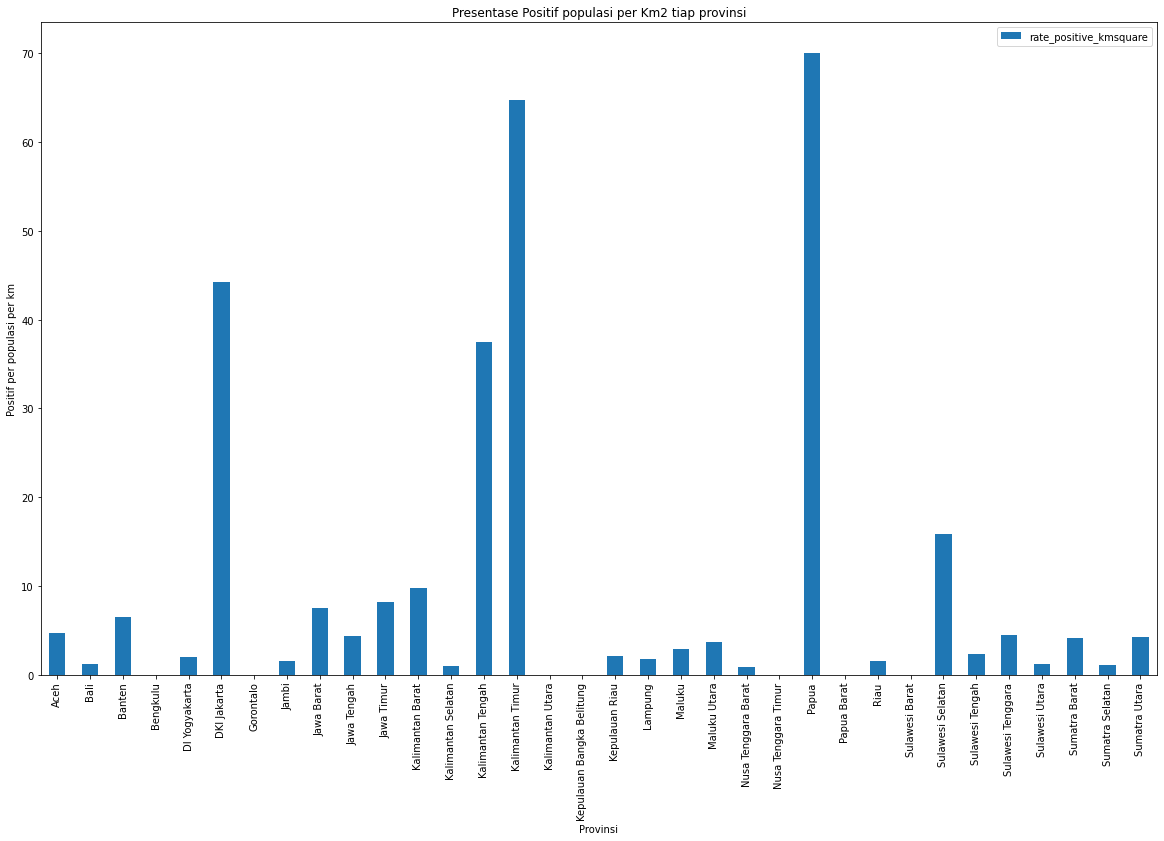

In [11]:
soal4[['rate_positive_kmsquare']].plot(figsize=(20,12),kind='bar')
plt.xticks(range(dfLen), soal4['province_name'])
plt.xlabel('Provinsi')
plt.ylabel('Positif per populasi per km')
plt.title('Presentase Positif populasi per Km2 tiap provinsi')
plt.show()

In [12]:
soal4.sort_values('rate_positive_kmsquare', ascending = False).head(3)

,province_name,population_kmsquare,confirmed,rate_positive_kmsquare
23,Papua,10,7,70.000000
14,Kalimantan Timur,17,11,64.705882
5,DKI Jakarta,1353,598,44.198078


###Soal 5
Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk masing-masing pulau. 

In [13]:
soal5 = df.groupby('island', axis=0).sum()
soal5['rate_positive_population'] = (soal5['confirmed']/soal5['population'])*100000
#Dikali dengan 100,000 karena angka yang dihasilkan terlalu kecil
soal5

,province_id,population,population_kmsquare,confirmed,deceased,released,rate_positive_population
island,,,,,,,
Jawa,44,143432781,6883,911,81,46,0.635141
Kalimantan,70,15048557,190,22,0,0,0.146193
Kepulauan Maluku,41,2796076,61,2,0,0,0.071529
Kepulauan Nusa Tenggara,47,13915592,1083,11,2,0,0.079048
Papua,49,3940856,12,7,0,0,0.177626
Sulawesi,152,18471854,631,35,1,0,0.189477
Sumatra,192,54412234,1257,29,2,0,0.053297


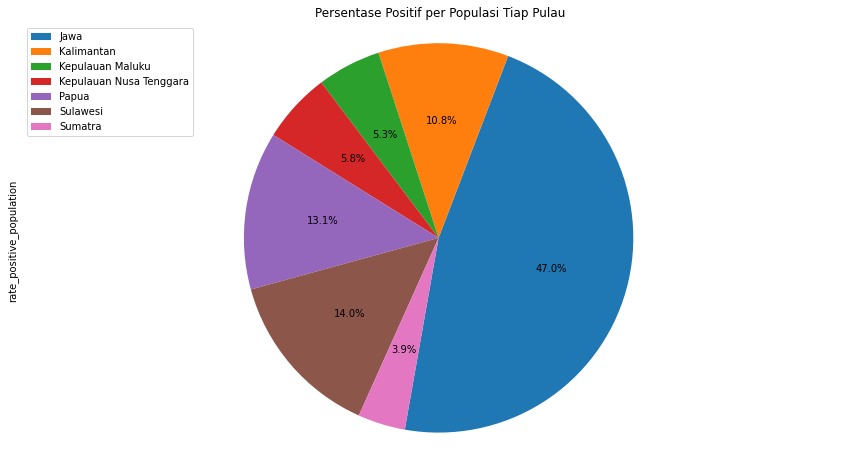

In [14]:
soal5['rate_positive_population'].plot(kind='pie', figsize=(15,8),autopct='%1.1f%%', startangle=260, labels=None)
plt.title('Persentase Positif per Populasi Tiap Pulau')
plt.axis('equal')
plt.legend(labels=soal5.index, loc='upper left')
plt.show()